In [1]:
# IMPORTS
from IPython.display import Image
import numpy as np
import pandas as pd

from random import randint

class Gen:
    def __init__(self,val):
        self.value = val
        self.cnt = 1
        self.adaptation = 2* (self.value*self.value +1) # ocena przystosowania
    def printBin(self):
        return bin(self.value)[2:].zfill(8) 
    def printAllInfo(self):
        return str("0b"+self.printBin()+" ("+str(self.value)+") cnt="+ str(self.cnt) + " adaptation: "+str(self.adaptation))



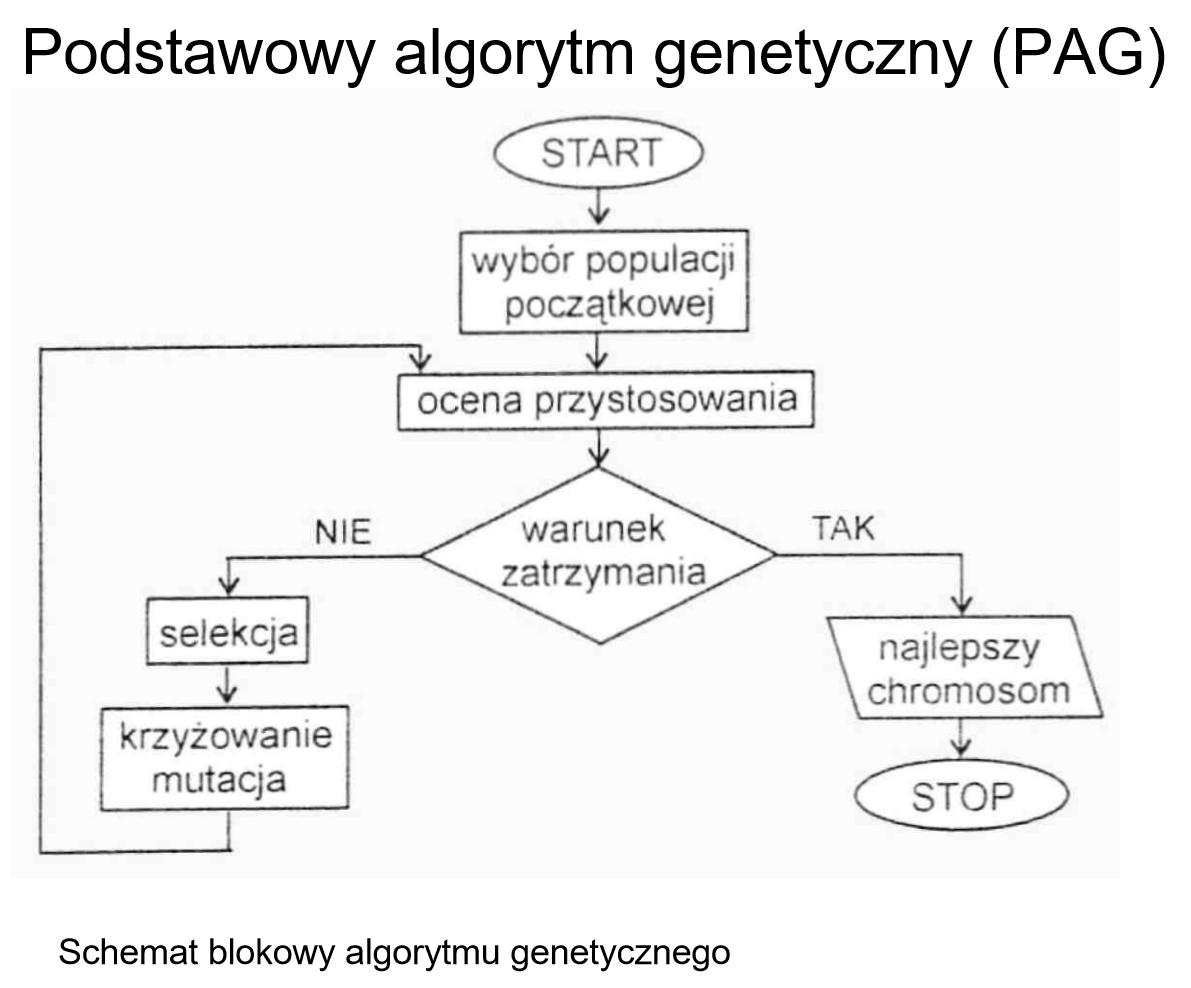

In [2]:
Image("img/PAG-schemat.PNG")

## 1. WYBÓR POPULACJI POCZĄTKOWEJ
#### -Populacja składa się z n punktów przestrzeni poszukiwań X (funkcja rand)
### f(x) = 2(x^2+1), gdzie x E <1...127>

In [17]:
populationCnt = 100 #rozmiar populacji
M = np.zeros(populationCnt).astype(int)
xMin = 1
xMax = 127
for x in range(populationCnt):
    M[x] = randint(xMin,xMax)
    #2*(randint(xMin,xMax)+1)
print(M)

print("\nPOSORTOWANE:")
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

M = selection_sort(M)
print(M)

[ 64  83  20 123  45  21  65 120  37  97  97  18  76   3  96  61  90  32
  90 109  19  62  17  29  33  73  28  89 122 122  47  79 100  46  87 123
 110  72  82  53  76  65  92   3 117  21  63  15 123  68  51  72   7  17
  62  34  61 107 101  78  77  29  12 122  10 125 103  72  46  43 119   7
  16  90   7  47  37  72  50 105  71 115  79  52  18 111  84  50  26  20
   6  95 102  83  70  22  76  78 113  98]

POSORTOWANE:
[  3   3   6   7   7   7  10  12  15  16  17  17  18  18  19  20  20  21
  21  22  26  28  29  29  32  33  34  37  37  43  45  46  46  47  47  50
  50  51  52  53  61  61  62  62  63  64  65  65  68  70  71  72  72  72
  72  73  76  76  76  77  78  78  79  79  82  83  83  84  87  89  90  90
  90  92  95  96  97  97  98 100 101 102 103 105 107 109 110 111 113 115
 117 119 120 122 122 122 123 123 123 125]


In [18]:
print("array(1,100) to list/ collection(T:Gen), count unical Gen, count genotypeSum ")
genotypeSum = 0

t_genList = []
t_genList.append(Gen(0))
for i in M:
    if i == t_genList[-1].value:
        t_genList[-1].cnt = t_genList[-1].cnt + 1
    else:
        t_genList.append(Gen(i))
        genotypeSum = genotypeSum + Gen(i).adaptation
del t_genList[0]
        
genGroup = t_genList

genotypeCnt = len(genGroup)
print("genotypeCnt = " + str(genotypeCnt))
print("genotypeSum = " + str(genotypeSum))


array(1,100) to list/ collection(T:Gen), count unical Gen, count genotypeSum 
genotypeCnt = 70
genotypeSum = 803504


object list to json, json to pandas, add % column
               Bin  Dec   Gain   part(%)  minLos  maxLos
00000011  00000011    3     20  0.000025       0      20
00000110  00000110    6     74  0.000092      20      94
00000111  00000111    7    100  0.000124      94     194
00001010  00001010   10    202  0.000251     194     396
00001100  00001100   12    290  0.000361     396     686
00001111  00001111   15    452  0.000563     686    1138
00010000  00010000   16    514  0.000640    1138    1652
00010001  00010001   17    580  0.000722    1652    2232
00010010  00010010   18    650  0.000809    2232    2882
00010011  00010011   19    724  0.000901    2882    3606
00010100  00010100   20    802  0.000998    3606    4408
00010101  00010101   21    884  0.001100    4408    5292
00010110  00010110   22    970  0.001207    5292    6262
00011010  00011010   26   1354  0.001685    6262    7616
00011100  00011100   28   1570  0.001954    7616    9186
00011101  00011101   29   1684  0.0020

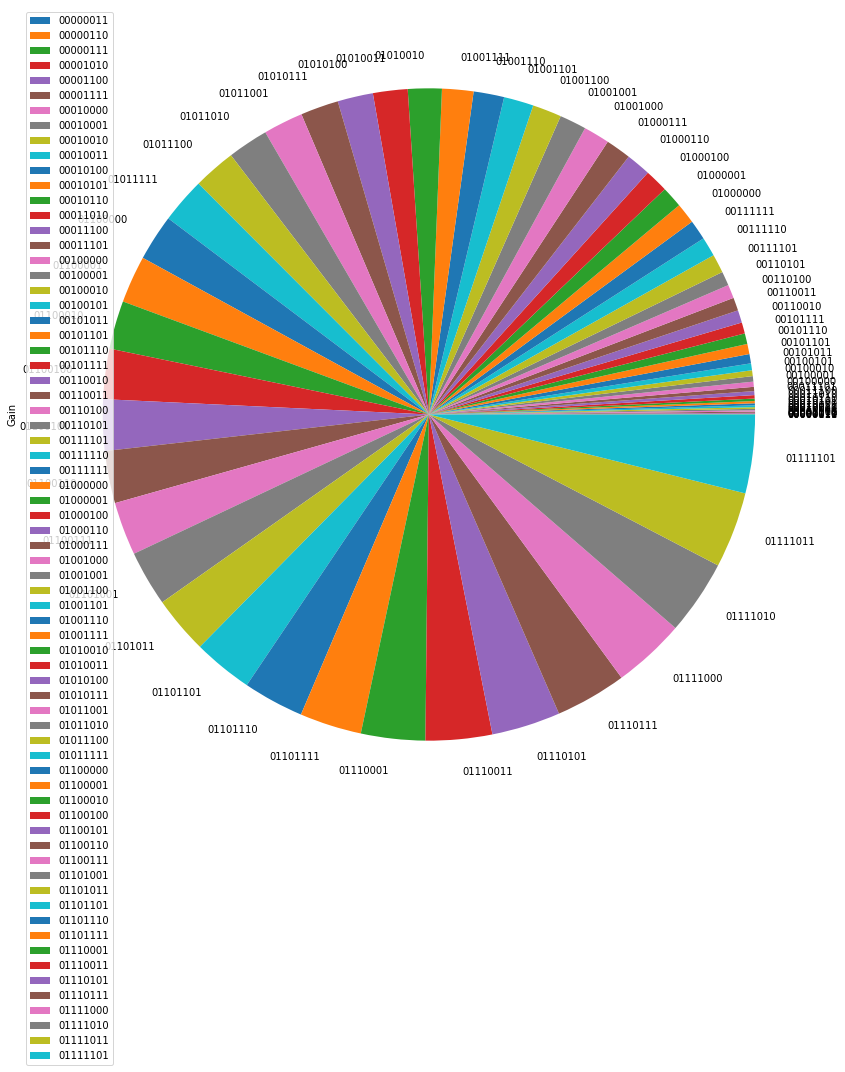

In [19]:
print("object list to json, json to pandas, add % column")
data = {}
losL = 0
losH = 0
for i in range(genotypeCnt):
    losH = losL+genGroup[i].adaptation
    data[genGroup[i].printBin()]= [genGroup[i].printBin(),genGroup[i].value, genGroup[i].adaptation,genGroup[i].adaptation/genotypeSum,losL,losH]
    losL = losH

    a = pd.DataFrame.from_dict(data,columns = ['Bin', 'Dec', 'Gain', 'part(%)','minLos','maxLos'], orient='index') 

for index, row in a.iterrows():
    row.values[3]=(row.values[2]/genotypeSum )
plot = a.plot.pie(y='Gain', figsize=(15, 15)) #, labels='Bin')
# plot.show()
print(a)

In [21]:
numpy_matrix = a.as_matrix()
# print(numpy_matrix)
M1 = np.zeros(populationCnt).astype(int)


for i in range(populationCnt):
    wylosowane = randint(0,genotypeSum)
    j=0
    while wylosowane > numpy_matrix[j,5]:  # dopóki wiekśze od max
        j = j + 1
#     print(numpy_matrix[j,:]) 
    M1[i]=numpy_matrix[j,1]
#     print(numpy_matrix[j,1])
# M1
M1 = selection_sort(M1)
print(M1)

[ 22  34  43  45  46  52  52  53  61  61  61  63  63  65  65  65  65  70
  71  71  73  73  73  77  78  78  79  79  82  82  83  83  84  84  87  89
  89  89  89  90  90  90  90  95  95  96  96  97 100 100 101 102 102 103
 103 105 105 107 109 109 109 109 109 110 110 110 111 111 111 111 113 113
 113 113 113 115 115 115 115 115 117 117 117 117 119 119 120 120 120 120
 120 122 122 123 123 123 123 125 125 125]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
